# Learning outcomes
- Image histogram
- Histogram equalization / CLAHE:
    * purpose: contrast enhancement (same effect as simple scalar multiplication)
- Thresholding (end results: binary mask with 255 as foreground)
- Morphological operations (manipulate the mask)
    - Erosion
    - Dilation
    - Opening
    - Closing
- Color spaces: RGB, HSV, and L\*a\*b
- Color based segmentation (HSV). Hue represents color, one channel encode color information.

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Image histogram

In [2]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# 2 ways to compute histogram
%timeit hist = cv.calcHist([gray], [0], None, [256], [0, 256])
%timeit hist, _ = np.histogram(gray.flatten(), 256)

36.7 µs ± 430 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.03 ms ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


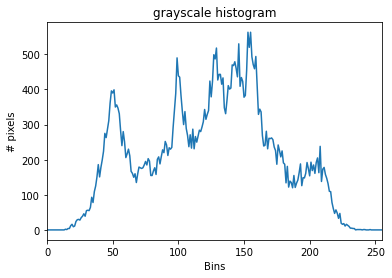

In [5]:
# construct histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0, 255])
plt.show()

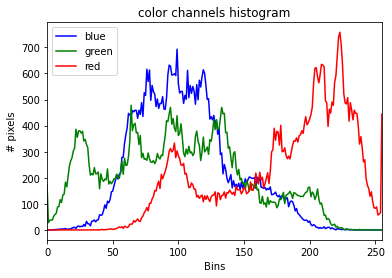

In [10]:
# compute histogram for all the channels
channels = cv.split(img)
colors = ("blue", "green", "red")

plt.figure()
plt.title("color channels histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for ch, color in zip(channels, colors):
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color, label=color)
    
plt.xlim([0, 255])
plt.legend()
plt.show()

## Histogram equalization

In [9]:
img = cv.imread("images/low_contrast_img.jfif", 0)
show_img("low contrast", img)

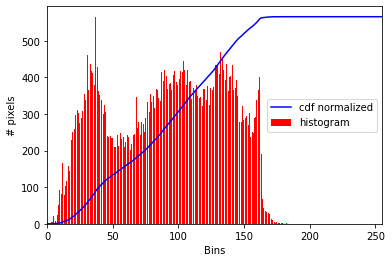

In [10]:
# histogram
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# compute cdf
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color="b")
plt.hist(img.flatten(), 256, color="r")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0, 255])
plt.legend(("cdf normalized", "histogram"))
plt.show()

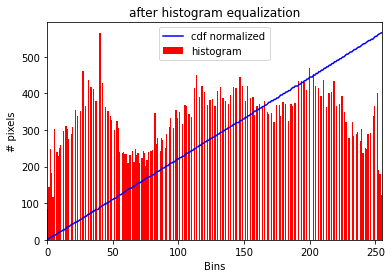

In [11]:
# histogram equalization
eq = cv.equalizeHist(img)


hist = cv.calcHist([eq], [0], None, [256], [0, 256])

# compute cdf
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color="b")
plt.hist(eq.flatten(), 256, color="r")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0, 255])
plt.legend(("cdf normalized", "histogram"))
plt.title("after histogram equalization")
plt.show()

In [12]:
cv.imshow("original", img)
show_img("equalization", eq)

In [13]:
img = cv.imread("images/dog1.jfif", 0)

# equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
dst = clahe.apply(img)

cv.imshow("orginal", img)
cv.imshow("equlization", eq)
show_img("clahe", dst)

In [15]:
img = cv.imread("images/winter_low_contrast.jfif", 0)

# equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(5, 5))
dst = clahe.apply(img)

cv.imshow("orginal", img)
cv.imshow("equlization", eq)
show_img("clahe", dst)

In [23]:
img = cv.imread("images/winter.jfif", 0)

# equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(8, 8))
dst = clahe.apply(img)

cv.imshow("orginal", img)
cv.imshow("equlization", eq)
show_img("clahe", dst2)

In [24]:
[i for i in dir(cv) if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [9]:
img = np.fromfunction(lambda i, j: j, (50, 256), dtype=np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img, x, 255, cv.THRESH_BINARY)
    _, img2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)
    
    cv.imshow("window", np.vstack((img1, img2, img3, img4, img5)))
    
cv.namedWindow("window")
cv.createTrackbar("threshold", "window", 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Comparison on the thresholding methods

In [10]:
img = cv.imread("images/noisy.jfif", 0)
show_img("noisy images", img)

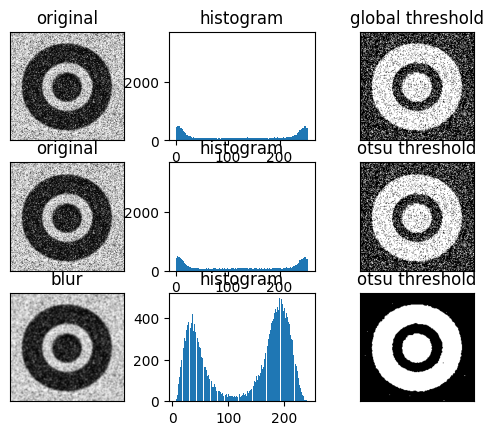

In [11]:
# apply 3 methods
#1: global threshold
th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

#2: OTSU threshold
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

#3: Gaussian blur + otsu threshold
blur = cv.GaussianBlur(img, (5, 5), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img, 0, th1,
       img, 0, th2,
       blur, 0, th3]

titles = ("original", "histogram", "global threshold",
         "original", "histogram", "otsu threshold",
         "blur", "histogram", "otsu threshold")

for i in range(3):
    plt.subplot(3, 3, 3*i+1), plt_img(imgs[3*i], title=titles[3*i])
    plt.subplot(3, 3, 3*i+2), plt.hist(imgs[3*i].flatten(), 256),
    plt.title(titles[3*i+1])
    plt.subplot(3, 3, 3*i+3), plt_img(imgs[3*i+2], title=titles[3*i+2])
    
plt.show()

## Morphological operations
- erosion
- dilation
- opening (erosion + dilation)
- closing (dilation + erosion)

In [12]:
# define the structuring element
kernel = np.ones((3, 3), dtype=np.uint8)

# erosion
dst = cv.erode(th3, kernel, iterations=1)

# show
img_combined = np.hstack((th3, dst))

show_img("erosion", img_combined)

In [8]:
# trackbar function and while loop
def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while (1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
        
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
    
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    # erosion
    erosion = cv.erode(th3, kernel, iterations=iteration)
    
    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break

cv.destroyAllWindows()

In [9]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [10]:
# Closing
res = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=2)

img_combined = np.hstack((th3, res))

show_img("closing", img_combined)

## Color spaces
- RGB ( the most prevalent color space. Any picture is stored under this format, but the downside of this color space is that there is no clear way to separate chroma (color and its saturation)). Not suitable for color base segmentation.
- HSV (Hue, Saturation, Value)
    - Hue -> color (make use of hue to segment color)
    - Saturation -> purity of color
    - Value -> brightness /luminance
- LAB
    - perceptual uniformity (the Euclidean distance in the color space corresponds to perceptual uniformity).

In [26]:
# Image sharpening with LAB
#1: split image int l, a, b
#2: sharpen te L channel
#3: merge color channels
img = cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
l, a, b = cv.split(img_lab)

# define sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
l_sharpened = cv.filter2D(l, -1, kernel)

# merge
img_lab_merge = cv.merge((l_sharpened, a, b))
dst = cv.cvtColor(img_lab_merge, cv.COLOR_LAB2BGR)

cv.imshow("original", img)
show_img("sharpen", dst)

## Demo on color based segmentation

In [27]:
img = cv.imread("images/color_space/pant.jfif")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

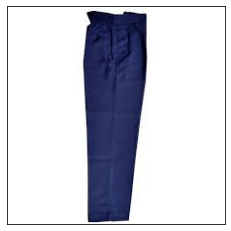

In [28]:
plt_img(img)
plt.show()

### Show the pixels in rgb color space

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

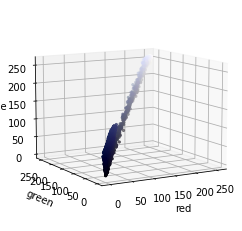

In [31]:
# split the color channels
r, g, b = cv.split(img)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection="3d")

# encode the color information
pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axes.scatter(r.ravel(), g.ravel(), b.ravel(),
            facecolors=pixel_colors, marker=".")
axes.view_init(elev=10, azim=240)
axes.set_xlabel("red")
axes.set_ylabel("green")
axes.set_zlabel("blue")
plt.show()

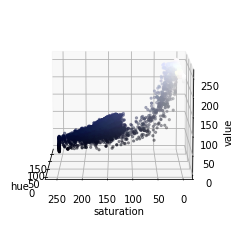

In [34]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection="3d")

axes.scatter(h.ravel(), s.ravel(), v.ravel(),
            facecolors=pixel_colors, marker=".")
axes.view_init(elev=10, azim=180)
axes.set_xlabel("hue")
axes.set_ylabel("saturation")
axes.set_zlabel("value")
plt.show()

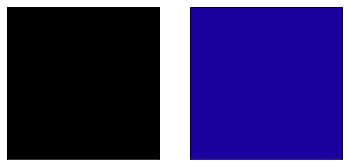

In [36]:
# h: 85 - 125 (range of blue in hsv)
# s: 90 - 255
# v: 0 -160
blue_low = (85, 90, 0)
blue_high = (125, 255, 160)

square1 = np.full((10, 10, 3), blue_low, dtype=np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

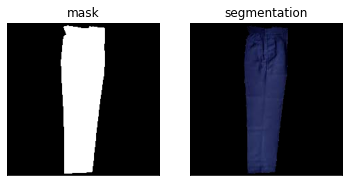

In [37]:
# color based segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)

plt.subplot(121), plt_img(mask, title="mask")
plt.subplot(122), plt_img(res, title="segmentation")
plt.show()

In [20]:
def color_seg(img, color_low, color_high, smooth=True):
    """Arguments
    img: source image(RGB)
    low_color: hsc low
    high_color: hsv high
    smooth: boolean (Gaussian blurring)"""
    
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    #morpholological operations
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    return cv.bitwise_and(img, img, mask=mask)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high) for img in imgs]

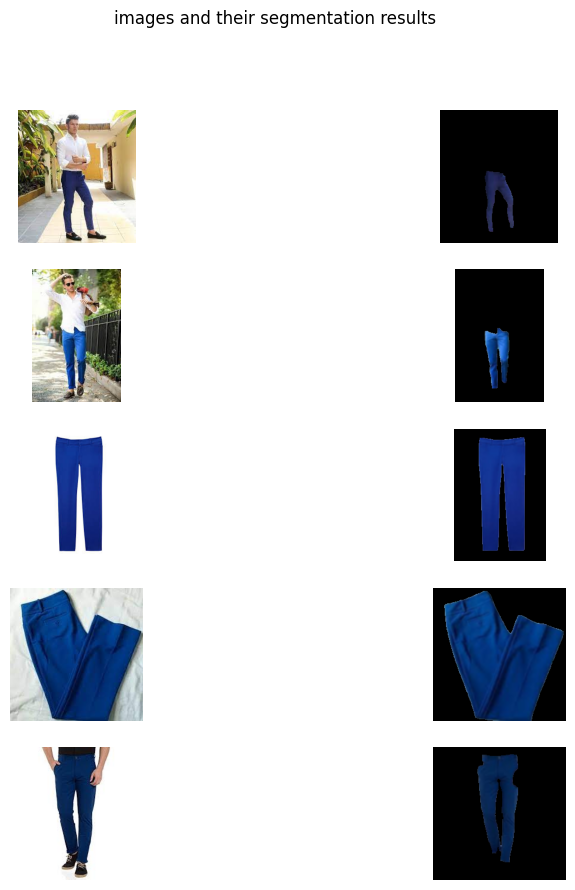

In [21]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("images and their segmentation results")
plt.show()

# Weekly activities
1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
    -Use 'boat.jpg' as input.
    -Apply Otsu thresholding.
    -Draw bounding box to identify the region where the boat and people are located.
2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
    -Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
    -Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.
3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

### Question 1

In [21]:
# Question 1
# Load the input image
image = cv.imread('images/boat.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Apply Otsu thresholding to segment white object on black background
_, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing the bounding box
imageBox = image.copy()

# Iterate through the contours to draw bounding boxes
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(imageBox, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save the image with bounding boxes
cv.imwrite('image_with_bounding_box.jpg', imageBox)

# Display or further process the image with bounding boxes
cv.imshow('Image with Bounding Box', imageBox)
cv.waitKey(0)
cv.destroyAllWindows()

### Question 2

In [3]:
# Question 2
image = cv.imread('images/leaf.jfif', cv.IMREAD_COLOR)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
th = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)[1]
# trackbar function and while loop
def nothing(x):
    pass

# Create a window and trackbar
wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 20, nothing)

while (1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
        
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    
    #Morphological operations
    erosion = cv.erode(th, kernel)
    dilation = cv.dilate(th, kernel)
    opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel)
    
    # Create images with text
    erosionText = cv.putText(erosion.copy(), 'Erosion', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    dilationText = cv.putText(dilation.copy(), 'Dilation', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    openingText = cv.putText(opening.copy(), 'Opening', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    closingText = cv.putText(closing.copy(), 'Closing', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Stack images horizontally
    stacked = np.hstack((erosionText, dilationText, openingText, closingText))
    
    cv.imshow(wn, stacked)

    k = cv.waitKey(1) & 0xFF
    if k==27:
        break

cv.destroyAllWindows()

### Question 3

In [54]:
# Question 3
blue_low = (85, 90, 0)
blue_high = (125, 255, 255)


lower_white = (0,0,230)
upper_white = (255,15,255)


def color_seg(img, color_low, color_high, lower_white, upper_white, smooth=True):
    """Arguments
    img: source image(RGB)
    low_color: hsc low
    high_color: hsv high
    smooth: boolean (Gaussian blurring)"""
    
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    mask_white = cv.inRange(img_hsv, lower_white, upper_white)
    final_mask = mask + mask_white
    #morpholological operations
    return cv.bitwise_and(img, img, mask= final_mask)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high, lower_white, upper_white) for img in imgs]

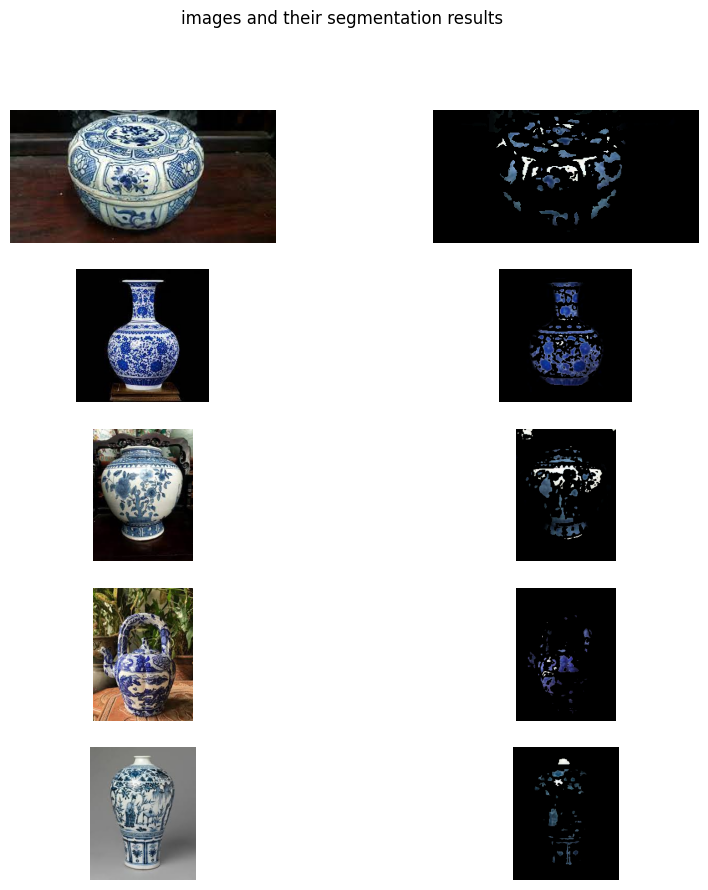

In [55]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("images and their segmentation results")
plt.show()